In [2]:
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
def load_text(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

In [4]:
def create_wordcloud(text, mask_path=None, output_path="wordcloud_output.png", background_color="white"):
    # Load mask image if provided
    mask = None
    if mask_path:
        mask = np.array(Image.open(mask_path))
    
    # Define stopwords
    stopwords = set(STOPWORDS)
    
    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color=background_color,
        stopwords=stopwords,
        mask=mask,
        contour_width=1,
        contour_color='black',
        colormap="viridis",
    ).generate(text)
    
    # Save the word cloud
    wordcloud.to_file(output_path)
    print(f"Word cloud saved to {output_path}")
    
    # Display the word cloud
    plt.figure(figsize=(10, 10), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [5]:
def main():
    # Input parameters
    text_file = "input_text.txt"  # Replace with your text file
    #mask_image = "mask_image.png"  # Optional: Replace with your mask image file or set to None
    output_image = "wordcloud_output.png"  # Output file for the word cloud
    
    try:
        # Load text
        text = load_text(text_file)
        
        # Generate word cloud
        create_wordcloud(text, output_path=output_image)
    except Exception as e:
        print(f"Error: {e}")

Word cloud saved to wordcloud_output.png


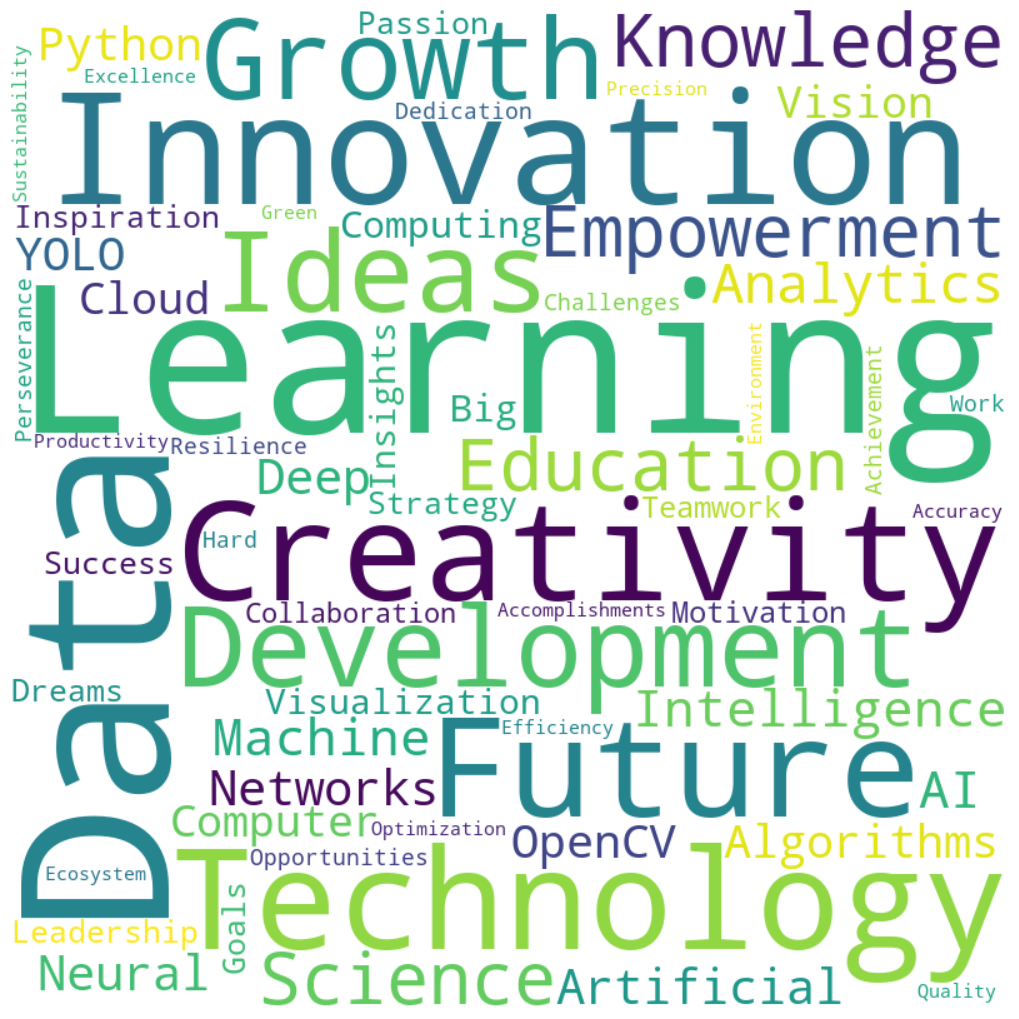

In [6]:
if __name__ == "__main__":
    main()